In [14]:
import numpy as np
from sennet.core.mmap_arrays import read_mmap_array
import matplotlib.pyplot as plt


def plot(file_path, p):
    # read labels
    img = read_mmap_array(file_path)
    
    print(f"{img.shape=}")
    x = np.ascontiguousarray(img.data[::2, ::2, ::2].copy())
    
    # calculate percentile 1 and 99
    print("computing percentiles")
    p1 = np.percentile(x, p)
    p99 = np.percentile(x, 100-p)

    print("drawing")
    plt.figure()
    # put vertical lines on the plot
    plt.axvline(p1, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(p99, color='r', linestyle='dashed', linewidth=2)

    xf = x.flatten()
    plt.hist(xf, bins=100)

    return (xf - p1) / (p99 - p1)


img.shape=[2279, 1303, 912]
computing percentiles
drawing
img.shape=[2217, 1041, 1511]
computing percentiles
drawing
img.shape=[1035, 1706, 1510]
computing percentiles
drawing


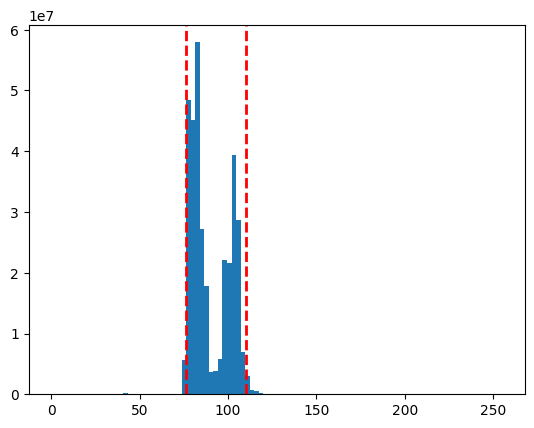

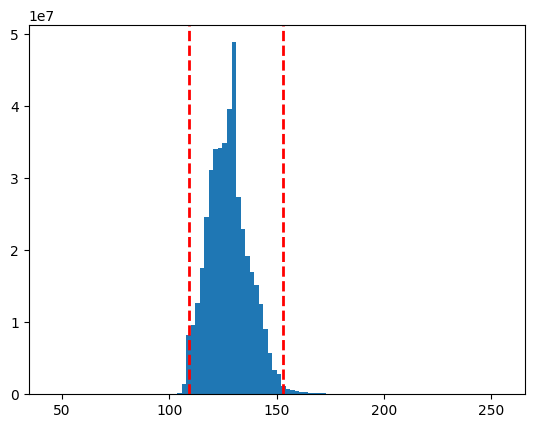

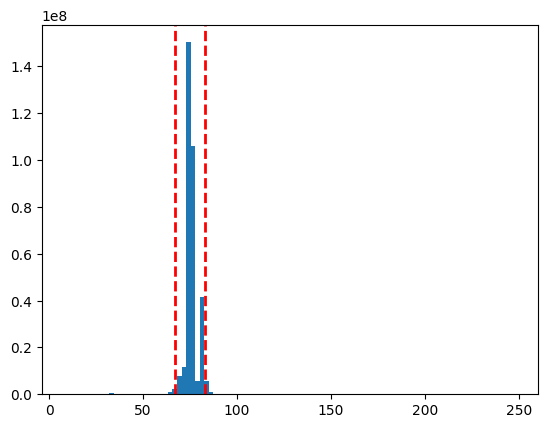

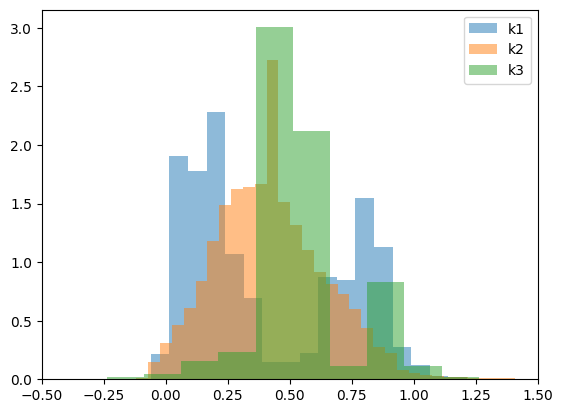

In [17]:
p = 1
n1 = plot("/opt/kaggle/sennet/data_dumps/processed/kidney_1_dense/image", p)
n2 = plot("/opt/kaggle/sennet/data_dumps/processed/kidney_2/image", p)
n3 = plot("/opt/kaggle/sennet/data_dumps/processed/kidney_3_sparse/image", p)

plt.figure()
plt.hist(n1, bins=100, alpha=0.5, label="k1", density=True)
plt.hist(n2, bins=100, alpha=0.5, label="k2", density=True)
plt.hist(n3, bins=100, alpha=0.5, label="k3", density=True)
plt.xlim(-0.5, 1.5)
plt.legend()